In [202]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [203]:
hr = pd.read_csv('IBM_HR-Employee-Attrition.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1. Downloaded the dataset from the ZIP file and uploaded it in the JUPYTER for further processing and analysis.
2. Stored the dataset in the dataframe.

In [204]:
# The columns listed in the dataset
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [205]:
# Displaying the number of rows and columns in the dataset
hr.shape

(1470, 35)

In [206]:
# Displaying the data types present in the columns
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [207]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From the above, it is observed that there are no null values present in the dataset.

In [208]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


From the above, general stats are viewed for each and every columns.

In [209]:
categorical_cols = [ segment for segment  in  hr.columns if hr[segment].dtypes=='object']
hr[categorical_cols].sample(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1144,No,Travel_Frequently,Sales,Other,Male,Sales Executive,Single,Y,No
857,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,Yes
1404,No,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,No
1225,No,Travel_Rarely,Research & Development,Technical Degree,Female,Research Director,Single,Y,No
1143,No,Non-Travel,Sales,Marketing,Male,Sales Executive,Married,Y,No
113,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,No
683,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Married,Y,Yes
1423,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,No
116,No,Travel_Rarely,Research & Development,Medical,Female,Manager,Single,Y,No
1366,No,Non-Travel,Sales,Life Sciences,Female,Sales Executive,Married,Y,No


It is observed that there are 9 categorical columns and 26 numerical columns which needs to be split for further processing.

In [210]:
numerical_cols = [segment for segment in hr.columns if hr[segment].dtypes!='object']
hr[numerical_cols].sample(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1343,29,592,7,3,1,1883,4,59,3,1,...,2,80,0,11,2,3,3,2,1,2
764,28,1144,10,1,1,1056,4,74,3,1,...,2,80,0,1,5,3,1,0,0,0
525,24,693,3,2,1,720,1,65,3,2,...,1,80,0,4,3,3,2,2,2,0
329,47,1482,5,5,1,447,4,42,3,5,...,2,80,1,21,2,3,3,2,1,1
669,39,1122,6,3,1,932,4,70,3,1,...,4,80,0,8,2,1,2,2,2,2
313,33,553,5,4,1,428,4,74,3,3,...,2,80,2,12,2,3,10,6,8,8
699,52,1053,1,2,1,976,4,70,3,4,...,2,80,1,26,2,2,9,8,7,8
1096,40,898,6,2,1,1550,3,38,3,4,...,4,80,0,21,2,3,21,7,7,7
1322,46,706,2,2,1,1857,4,82,3,3,...,3,80,1,12,4,2,9,8,4,7
924,35,735,6,1,1,1291,3,66,3,1,...,4,80,0,4,3,3,3,2,2,2


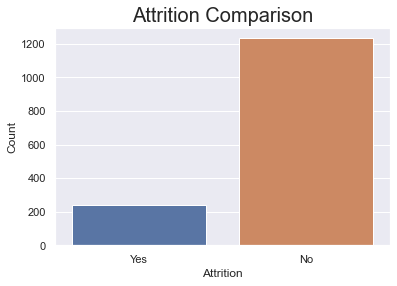

In [211]:
sns.countplot('Attrition', data=hr)
plt.title('Attrition Comparison', fontsize = 20)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

It is observed that the employees exiting the organization is low comparatively.

In [212]:
attrition_count = hr['Attrition'].value_counts()
attrition_rate = (attrition_count['Yes'] / hr.shape[0]) * 100
print("Attrition Rate : {:.2f}%".format(attrition_rate))

Attrition Rate : 16.12%


The attrition rate is found to be around 16.12% in the given dataset.

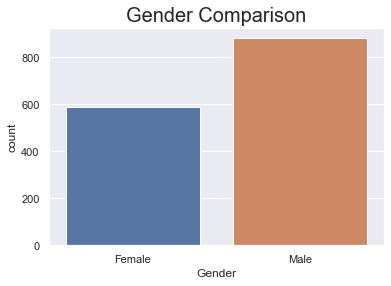

In [213]:
sns.countplot('Gender', data=hr)
plt.title('Gender Comparison', fontsize=20)
plt.xlabel('Gender')
plt.show()

It is understood that the male employeess are greater than the female employees.

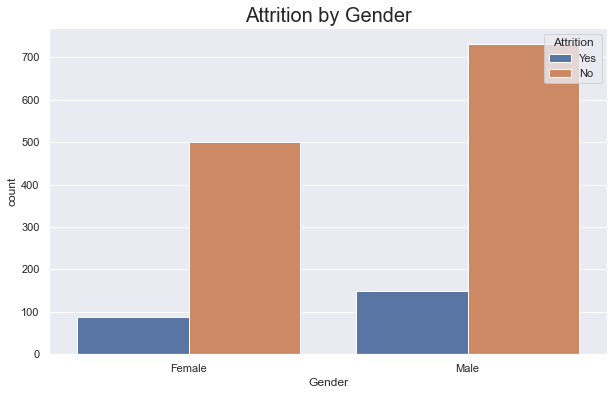

In [214]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.countplot(x='Gender', hue='Attrition', data=hr)
plt.title('Attrition by Gender', fontsize=20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

The attrition rate is found to be greater with the male employees comparatively.

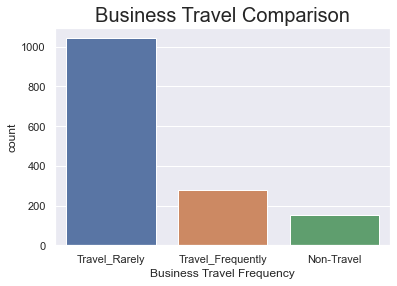

In [215]:
sns.countplot('BusinessTravel', data=hr)
plt.title('Business Travel Comparison', fontsize=20)
plt.xlabel('Business Travel Frequency')
plt.show()

From the above, it is observed that employees who travel rarely are higher comparatively.

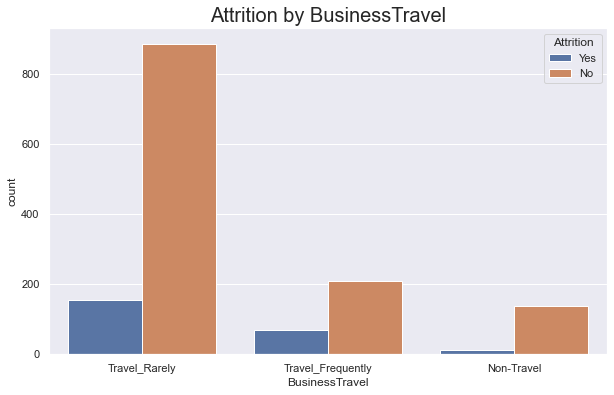

In [216]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.countplot(x='BusinessTravel', hue='Attrition', data=hr)
plt.title('Attrition by BusinessTravel', fontsize=20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

From the above, it is also understood that the employees who travel rarely have exited the organozation and the employees who never travelled have very less attrition rate.

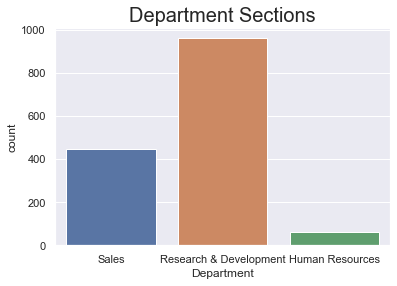

In [217]:
sns.countplot('Department', data=hr)
plt.title('Department Sections', fontsize=20)
plt.xlabel('Department')
plt.show()

From the above, it is understood that most of the employees are employed in R&D Department while less in HR Department.

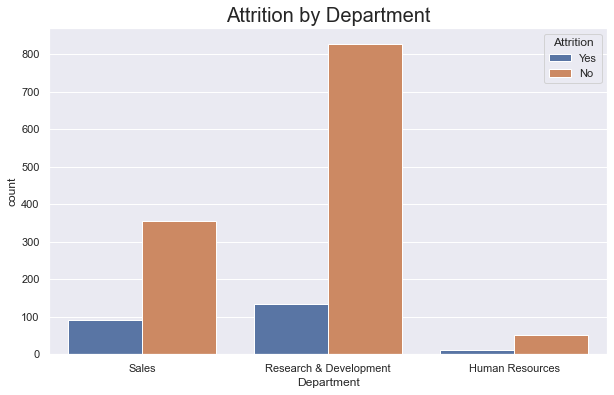

In [218]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.countplot(x='Department', hue='Attrition', data=hr)
plt.title('Attrition by Department', fontsize = 20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

From the above, it is oberseved that the attrition rate is high with R&D followed up by Sales department.

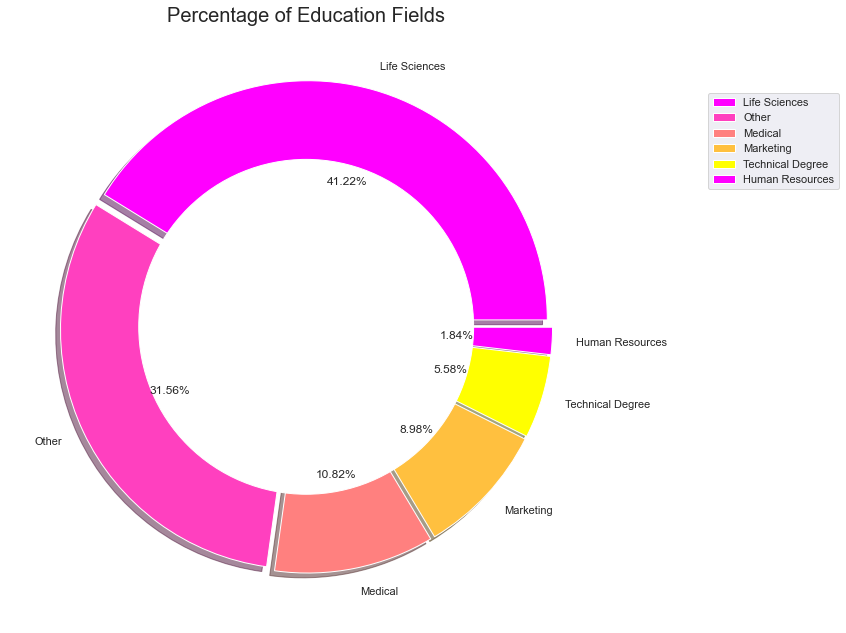

In [219]:
size = hr['EducationField'].value_counts()
labels = hr['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))
explode = [0.03,0.03,0.03,0.03,0.03,0.03]

plt.figure(figsize=(11,11))
circle= plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels,explode = explode, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=20)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

From the figure, it is understood that employees with education 'LIFE SCIENCE' education field is employed higher.

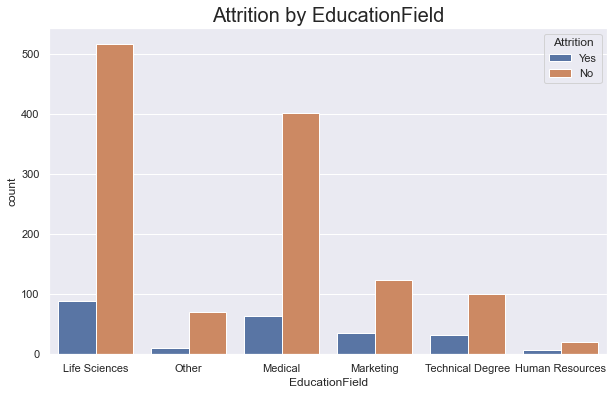

In [220]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.countplot(x='EducationField', hue='Attrition', data=hr)
plt.title('Attrition by EducationField', fontsize=20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

From the above, it is understood that the attrition rate is higher with employees from 'MEDICAL' education field though the employees employed with 'LIFE SCIENCE' education field is higher.

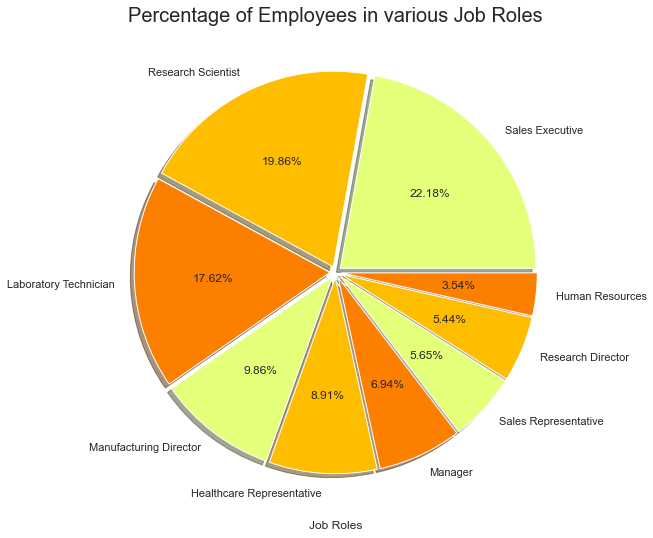

In [221]:
size = hr['JobRole'].value_counts()
labels = hr['JobRole'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Percentage of Employees in various Job Roles', fontsize=20)
plt.xlabel('Job Roles')
plt.show()

From the above figure, it is observed that the employees in Sales Executive, Research Scientist and Laboratory Technician is higher.

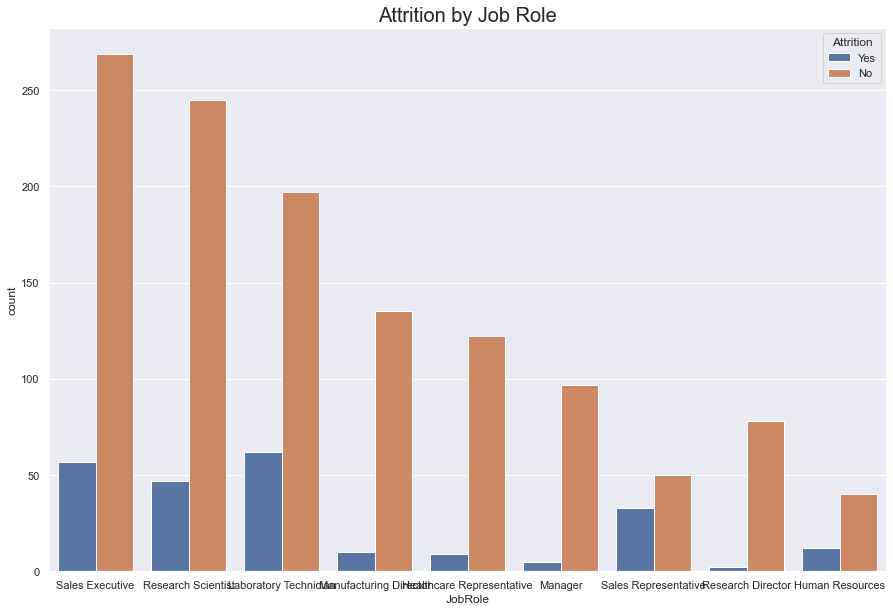

In [222]:
plt.figure(figsize=(15, 10))
sns.set(style="darkgrid")
sns.countplot(x='JobRole', hue='Attrition', data=hr)
plt.title('Attrition by Job Role', fontsize=20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

The attrition rate is higher with Sales Representative role followed by Human Resources and Laboratory Technician.

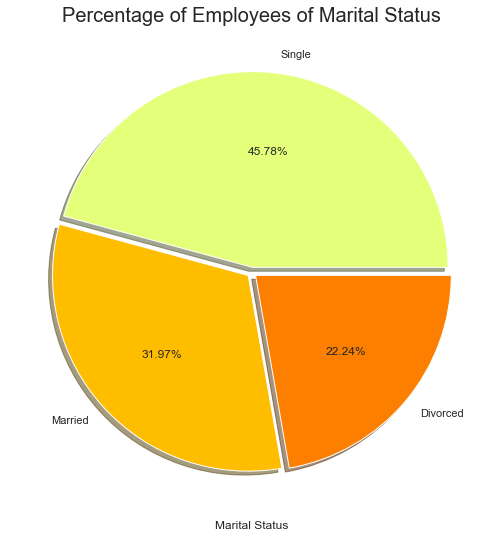

In [223]:
size=hr['MaritalStatus'].value_counts()
labels=hr['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.025,0.025,0.025]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Percentage of Employees of Marital Status', fontsize=20)
plt.xlabel('Marital Status')
plt.show()

From the above figure, it is understood that employees who are divorced are employed in great numbers when compared with unmarried and married employees.

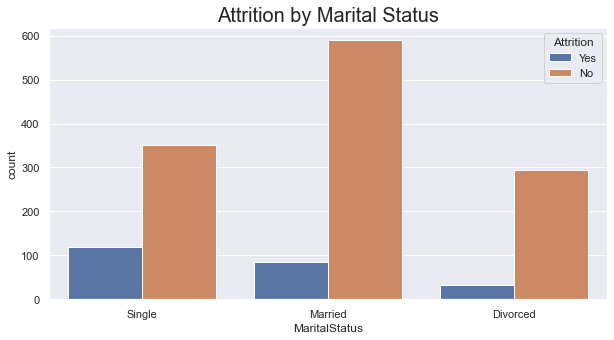

In [224]:
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot(x='MaritalStatus', hue='Attrition', data=hr)
plt.title('Attrition by Marital Status', fontsize=20)
plt.legend(title='Attrition', loc='upper right')
plt.show()

From the above, it is understood that the attrition rate is comparatively higher with unmaaried and married employees.

In [225]:
# Removing the unnecessary columns
hr = hr.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
hr.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
764,28,No,Travel_Rarely,1144,Sales,10,1,Medical,4,Male,...,4,2,0,1,5,3,1,0,0,0
1159,39,No,Travel_Frequently,711,Research & Development,4,3,Medical,1,Female,...,3,4,0,10,2,1,9,2,3,8
1126,50,No,Travel_Rarely,264,Sales,9,3,Marketing,3,Male,...,3,3,1,27,2,3,1,0,0,0
246,33,No,Travel_Rarely,832,Research & Development,5,4,Life Sciences,3,Female,...,3,3,1,2,2,2,2,2,0,2


In [226]:
le = LabelEncoder()
hr['BusinessTravel'] = le.fit_transform(hr['BusinessTravel'])
hr['Department'] = le.fit_transform(hr['Department'])
hr['EducationField'] = le.fit_transform(hr['EducationField'])
hr['Gender'] = le.fit_transform(hr['Gender'])
hr['MaritalStatus'] = le.fit_transform(hr['MaritalStatus'])
hr['OverTime'] = le.fit_transform(hr['OverTime'])
hr['JobRole'] = le.fit_transform(hr['JobRole'])
hr.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
88,30,No,2,288,1,2,3,1,3,1,...,3,1,3,11,3,3,11,10,10,8
282,29,No,1,442,2,2,2,1,2,1,...,3,1,0,10,3,2,10,7,0,9
388,42,No,2,201,1,1,4,1,2,0,...,3,2,1,8,5,3,5,2,1,2
920,34,No,1,135,1,19,3,3,3,0,...,3,3,2,15,2,4,11,8,5,10
190,52,No,2,699,1,1,4,1,3,1,...,3,1,1,34,5,3,33,18,11,9
93,46,No,1,638,1,1,3,3,3,1,...,3,3,1,21,5,2,10,9,9,5
745,55,No,1,135,1,18,4,3,3,1,...,3,4,2,17,3,3,8,7,6,7
535,41,No,2,427,0,10,4,0,2,1,...,3,2,3,23,2,2,21,6,12,6
1249,29,Yes,2,428,2,9,3,2,2,0,...,3,3,0,2,3,3,2,2,2,2
287,38,No,2,688,1,23,4,1,4,1,...,3,2,1,10,2,3,2,2,1,2


Here, the catoegorical data of the above columns are converted to numerical data for training and testing.

In [227]:
y = hr.iloc[:, 1]
x = hr
x.drop('Attrition', axis = 1, inplace = True)

In [228]:
print(x.shape)
print(y.shape)

(1470, 30)
(1470,)


In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

Here, the data is split into feature and target variable.

In [230]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
  
def print_score(clf, X_train, y_train, x_test, y_test, train=True):
  
    if train:
        print("Train Result:")
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(x_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(x_train))))
        
        result = cross_val_score(clf, x_train, y_train,cv=10, scoring='accuracy')
        print("Average Accuracy Result: \t {0:.2f}".format(np.mean(result)))
        print("Accuracy SD Result: \t\t {0:.2f}".format(np.std(result)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(x_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(x_test))))
        print("Accuracy score Result: {0:.2f}\n".format(accuracy_score(y_test, clf.predict(x_test))))
    
print_score(rfc, x_train, y_train, x_test, y_test, train=True)
print_score(rfc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       922
         Yes       1.00      1.00      1.00       180

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[922   0]
 [  0 180]]

Average Accuracy Result: 	 0.85
Accuracy SD Result: 		 0.01
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.87      0.99      0.93       311
         Yes       0.82      0.16      0.26        57

    accuracy                           0.86       368
   macro avg       0.84      0.58      0.59       368
weighted avg       0.86      0.86      0.82       368


Confusion Matrix: 
 [[309   2]
 [ 48   9]]

Accuracy score Result: 0.86



Random Forest Classifier is used to train and test the data for which the accuracy score is found to be 86%.

In [231]:

def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("KNN Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(x_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(x_train))))
 
        result = cross_val_score(clf, x_train, y_train, cv = 10, scoring ='accuracy')
        print("Average Accuracy Result: \t {0:.2f}".format(np.mean(result)))
        print("Accuracy SD Result: \t\t {0:.2f}".format(np.std(result)))
        print("Accuracy score Result: {0:.2f}\n".format(accuracy_score(y_train, clf.predict(x_train))))
        print("\n")
                
    elif train == False:
        print("Test Result:")
        print("-----------")
        print("KNN Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(x_test))))
        print("Confusion Matrix Output: \n {}\n".format(confusion_matrix(y_test, clf.predict(x_test))))
        print("Accuracy Score Result: {0:.2f}\n".format(accuracy_score(y_test, clf.predict(x_test))))
         
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print_score(knn, x_train, y_train, x_test, y_test, train = True)
print_score(knn, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
KNN Classification Report: 
               precision    recall  f1-score   support

          No       0.87      0.98      0.93       922
         Yes       0.77      0.28      0.41       180

    accuracy                           0.87      1102
   macro avg       0.82      0.63      0.67      1102
weighted avg       0.86      0.87      0.84      1102


Confusion Matrix: 
 [[907  15]
 [130  50]]

Average Accuracy Result: 	 0.83
Accuracy SD Result: 		 0.01
Accuracy score Result: 0.87



Test Result:
-----------
KNN Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.94      0.89       311
         Yes       0.14      0.05      0.08        57

    accuracy                           0.80       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.73      0.80      0.76       368


Confusion Matrix Output: 
 [[292  19]
 [ 54   3]]

Accuracy Score Result: 0.80



KNN classifier is used to train and test the data for which the accuracy score is found to be 80%.

There is no overtime yet the employees exit the organization who have considered that they have been underused.

Monthly Income is an important factor to be considered as why employees exit the organization/company seeking for a higher salary.

Employees who are looking to retire will leave the organization as age is also an important factor to be considered.

There are most likely reasons why employees exit the organization/company which can help the organization/company take specific actions in order to reduce the attrition rate in the organization.